Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Lance"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [58]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): 
    # acquires the median number between x_1 to x_3. This ensures that there will be at least 
    # one value that will be compared and reduces the subproblem step count of qsort 
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    #sorts the list without the uses of recursion but with the use of while condition 
    #uses a modified splitting where it accounts for duplicates using 'counts'
    #the looping mechanism 'while' is currently updated from the last part of the while loop "indices.append"
    indices = [(0, len(lst))]

    while indices: #instead of using recursion, it uses conditional statements
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    # shuffles the list instead of choosing a random integer in the list 
    # calls on qsort to implement sorting 
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    # checks of the algorithm is correctly implementing the sorting by using assertion
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

qsort([5,1,2,3,4])

0.055656164997344604


[1, 2, 3, 4, 5]

In [59]:
# test block for understanding functions 
test_indices = [(0, 5)]
test_indices.pop()

test_list = [1,2,3,4,5]
random.choice(test_list)

3

## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The main difference is in the function "randomized_quicksort" where is uses a shuffling function instead of a function that randomly chooses an integer which is what in the Corme et al., reading implements. Therefore, in the algorithm above, it randomizes the list first. 

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

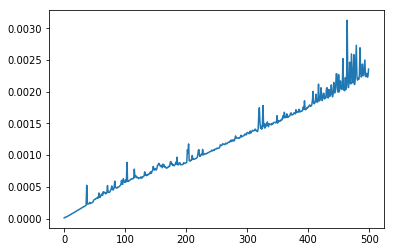

In [60]:
import matplotlib.pyplot as plt 
import time

### PLOTTING ### 
r_time = []
x_values = []


for N in range(500): 
    r_start = time.time()
    randomized_quicksort()
    r_end = time.time() 
    t_time = r_end - r_start
    r_time.append(t_time) 
    
    x_values.append(N)
    
plt.plot(x_values, r_time)

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [85]:
def qsort_2(lst):
    #sorts the list without the uses of recursion but with the use of while condition 
    #uses a modified splitting where it accounts for duplicates using 'counts'
    #the looping mechanism 'while' is currently updated from the last part of the while loop "indices.append"
    indices = [(0, len(lst))]

    while indices: #instead of using recursion, it uses conditional statements
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] 
        upper = [a for a in lst[frm:to] if a >= partition]
#         counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = frm + len(upper)

        # Push back into correct place:
        lst[frm:ind1] = lower
#         lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [86]:
qsort_2([4,2,1,1])

IndexError: list index out of range

In [66]:
assert(qsort_2([4,2,1])==[1,2,4])
assert(qsort_2([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [87]:
def qsort(lst):
    #sorts the list without the uses of recursion but with the use of while condition 
    #uses a modified splitting where it accounts for duplicates using 'counts'
    #the looping mechanism 'while' is currently updated from the last part of the while loop "indices.append"
    indices = [(0, len(lst))]

    while indices: #instead of using recursion, it uses conditional statements
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = lst[0]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [88]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
### PLOTTING ### 
r_time = []
x_values = []


for N in range(500): 
    r_start = time.time()
    randomized_quicksort()
    r_end = time.time() 
    t_time = r_end - r_start
    r_time.append(t_time) 
    
    x_values.append(N)
    
plt.plot(x_values, r_time)

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


YOUR ANSWER HERE